In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

import seaborn as sns

In [2]:
# df = pd.read_csv("/Users/brookeholyoak/Downloads/BH-Spreadsheets_Exercises_Solutions - bh_mytable_customer_details.csv")
df = pd.read_csv("/Users/brookeholyoak/BH_AT_customer_details.csv")

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,start_date,start_year,start_month,start_day,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
0,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,72.10,...,20200111,2020,1,11,72.10,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
1,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.10,...,20200111,2020,1,11,25.10,True,Month-to-Month,No Phone Service,DSL,Internet Only
2,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer automatic,30.50,...,20200111,2020,1,11,30.50,True,Month-to-Month,No Phone Service,DSL,Internet Only
3,0082-LDZUE,Male,0,No,No,1,1,0,Mailed check,44.30,...,20200111,2020,1,11,44.30,True,Month-to-Month,One Line,DSL,Phone+Internet
4,0107-WESLM,Male,0,No,No,1,0,0,Electronic check,19.85,...,20200111,2020,1,11,19.85,True,Month-to-Month,One Line,No Internet Service,Phone Only


In [3]:
df.shape

(7043, 29)

In [4]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,start_date,start_year,start_month,start_day,average_monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,1.325004,1.222916,0.690473,64.761692,2283.300441,32.368309,1.082209,2.017013e+07,2016.950021,6.130626,15.043305,64.697004
std,0.368612,0.642730,0.778877,0.833755,30.090047,2266.771362,24.597021,1.226274,2.057460e+04,2.061343,3.727166,8.387906,30.171186
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,2.013070e+07,2013.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.500000,401.450000,9.000000,0.000000,2.015071e+07,2015.000000,3.000000,9.000000,35.450000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.475000,29.000000,1.000000,2.017092e+07,2017.000000,6.000000,14.000000,70.350000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3794.737500,55.000000,2.000000,2.019052e+07,2019.000000,10.000000,22.000000,89.850000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.000000,3.000000,2.020021e+07,2020.000000,12.000000,31.000000,118.750000


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,start_date,start_year,start_month,start_day,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
0,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,72.10,...,20200111,2020,1,11,72.10,True,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
1,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,25.10,...,20200111,2020,1,11,25.10,True,Month-to-Month,No Phone Service,DSL,Internet Only
2,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer automatic,30.50,...,20200111,2020,1,11,30.50,True,Month-to-Month,No Phone Service,DSL,Internet Only
3,0082-LDZUE,Male,0,No,No,1,1,0,Mailed check,44.30,...,20200111,2020,1,11,44.30,True,Month-to-Month,One Line,DSL,Phone+Internet
4,0107-WESLM,Male,0,No,No,1,0,0,Electronic check,19.85,...,20200111,2020,1,11,19.85,True,Month-to-Month,One Line,No Internet Service,Phone Only


In [7]:
#churned_cust gives back a bool list. I want to create something that will give me ONLY the churned customers.

#I want to see the number of churned customers who are also month to month customers.

#I want to see how many of the MTM Churned customers are using FIBER
#I want to see how many of the MTM Churned customers are using DSL
#I want to see how many of the MTM Churned customers do not have internet
#Do payment Types play a role?
#I want to see what payment types FIBER MTM Churned customers are using
#is there are payment type that is significantly higher among FIBER MTM churned customers?
#Does tenure play a role?
#breakdowns (maybe buckets) of tenure in FIBER MTM churned customers: 1 mon, 6 mon, 1 yr, 2 yr, 3 yr, 4 yr, 5 yr+
#maybe with more time, 
#i can look at relationship/correlation between payment and tenure, and even further look at cost 








In [8]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet',
       'partner_dependents', 'start_date', 'start_year', 'start_month',
       'start_day', 'average_monthly_charges', 'validate_monthly_charges',
       'contract_type_desc', 'phone_type_desc', 'internet_type_desc',
       'service_type'],
      dtype='object')

In [52]:
df1 = df[['has_churned', 'internet_type_desc', 'contract_type', 'payment_type', 'tenure', 'average_monthly_charges']]
df1

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges
0,False,Fiber Optic,0,Electronic check,1,72.10
1,True,DSL,0,Electronic check,1,25.10
2,True,DSL,0,Bank transfer automatic,1,30.50
3,False,DSL,0,Mailed check,1,44.30
4,True,No Internet Service,0,Electronic check,1,19.85
...,...,...,...,...,...,...
7038,False,No Internet Service,2,Bank transfer automatic,77,19.40
7039,False,No Internet Service,2,Bank transfer automatic,77,25.15
7040,False,No Internet Service,2,Credit card automatic,77,20.25
7041,False,No Internet Service,2,Bank transfer automatic,77,26.00


In [53]:
churn_cust = df1[df1['has_churned']== True]
churn_cust
#filtered out customers who are still with company, bc I want to look at ONLY churned customers

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges
1,True,DSL,0,Electronic check,1,25.10
2,True,DSL,0,Bank transfer automatic,1,30.50
4,True,No Internet Service,0,Electronic check,1,19.85
5,True,Fiber Optic,0,Electronic check,1,99.75
6,True,Fiber Optic,0,Mailed check,1,80.20
...,...,...,...,...,...,...
6732,True,Fiber Optic,2,Electronic check,71,103.40
6911,True,Fiber Optic,2,Bank transfer automatic,73,106.00
6912,True,DSL,2,Credit card automatic,73,65.30
6936,True,DSL,2,Electronic check,73,54.20


In [54]:
mtm_churned = churn_cust[churn_cust['contract_type']== 0]
mtm_churned
#now i have only customers who have churned and who are on mtm plans. I am interested in why MTM customers have churned.

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges
1,True,DSL,0,Electronic check,1,25.10
2,True,DSL,0,Bank transfer automatic,1,30.50
4,True,No Internet Service,0,Electronic check,1,19.85
5,True,Fiber Optic,0,Electronic check,1,99.75
6,True,Fiber Optic,0,Mailed check,1,80.20
...,...,...,...,...,...,...
3858,True,Fiber Optic,0,Electronic check,69,102.95
3860,True,Fiber Optic,0,Electronic check,69,105.30
3861,True,Fiber Optic,0,Credit card automatic,70,99.45
3873,True,Fiber Optic,0,Credit card automatic,72,105.10


In [55]:
# using the below code as an example of how to get counts of fiber,dsl,no internet

# mpg.groupby('manufacturer').manufacturer.count()
# how many manufacturers are there, I first grouped by manufacturer, then count how many rows

mtm_churned.groupby('internet_type_desc').internet_type_desc.count()

internet_type_desc
DSL                     394
Fiber Optic            1162
No Internet Service      99
Name: internet_type_desc, dtype: int64

In [13]:
#now let's look at the payment type
mtm_churned.groupby('payment_type').payment_type.count()

payment_type
Bank transfer automatic    201
Credit card automatic      178
Electronic check           994
Mailed check               282
Name: payment_type, dtype: int64

In [14]:
mtm_churned.internet_type_desc.value_counts(normalize = True)
#70% of mtm churned customers have fiber

Fiber Optic            0.702115
DSL                    0.238066
No Internet Service    0.059819
Name: internet_type_desc, dtype: float64

In [15]:
mtm_churned.payment_type.value_counts(normalize = True)
#60% of mtm churned customers pay by e-check

Electronic check           0.600604
Mailed check               0.170393
Bank transfer automatic    0.121450
Credit card automatic      0.107553
Name: payment_type, dtype: float64

In [16]:
#now let's compare those with the total of customers

df.internet_type_desc.value_counts(normalize = True)
#this is percentage of the whole, not just churned customers
#only 43% of the total customers have fiber

Fiber Optic            0.439585
DSL                    0.343746
No Internet Service    0.216669
Name: internet_type_desc, dtype: float64

In [214]:
df.internet_type_desc.value_counts()

Fiber Optic            3096
DSL                    2421
No Internet Service    1526
Name: internet_type_desc, dtype: int64

In [216]:
mtm_all = df[df['contract_type']== 0]

In [217]:
mtm_all.internet_type_desc.value_counts()

Fiber Optic            2128
DSL                    1223
No Internet Service     524
Name: internet_type_desc, dtype: int64

In [219]:
mtm_all.internet_type_desc.value_counts(normalize = True, sort = False)

No Internet Service    0.135226
DSL                    0.315613
Fiber Optic            0.549161
Name: internet_type_desc, dtype: float64

In [17]:
df.payment_type.value_counts(normalize = True)
#percentage of the whole customer base and payment type
#only 33.5% of the total customers use e-check

Electronic check           0.335794
Mailed check               0.228880
Bank transfer automatic    0.219225
Credit card automatic      0.216101
Name: payment_type, dtype: float64

In [18]:
# next using the same methods above, check out these same numbers for mtm customers who stayed. (fiber and e-check)

<AxesSubplot:xlabel='payment_type', ylabel='tenure'>

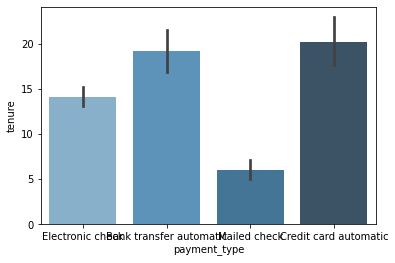

In [19]:
sns.barplot(x="payment_type", y="tenure", data=mtm_churned,
                 palette="Blues_d")

<AxesSubplot:xlabel='internet_type_desc', ylabel='tenure'>

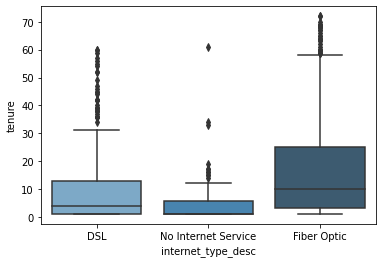

In [20]:
sns.boxplot(x="internet_type_desc", y="tenure", data=mtm_churned,
                 palette="Blues_d")

In [21]:
#Look at customers who did NOT churn

not_churned = df1[df1['has_churned']== False]
not_churned.head(30)

,has_churned,internet_type_desc,contract_type,payment_type,tenure
0,False,Fiber Optic,0,Electronic check,1
3,False,DSL,0,Mailed check,1
10,False,No Internet Service,0,Mailed check,1
11,False,DSL,0,Electronic check,1
16,False,DSL,0,Electronic check,1
28,False,DSL,0,Bank transfer automatic,1
30,False,No Internet Service,0,Mailed check,1
31,False,No Internet Service,0,Mailed check,1
32,False,DSL,0,Electronic check,1
39,False,DSL,0,Electronic check,1


In [22]:
#filtering more to get mtm customers who have stayed

mtm_not_churned = not_churned[not_churned['contract_type']== 0]
mtm_not_churned

,has_churned,internet_type_desc,contract_type,payment_type,tenure
0,False,Fiber Optic,0,Electronic check,1
3,False,DSL,0,Mailed check,1
10,False,No Internet Service,0,Mailed check,1
11,False,DSL,0,Electronic check,1
16,False,DSL,0,Electronic check,1
...,...,...,...,...,...
3868,False,Fiber Optic,0,Bank transfer automatic,71
3869,False,Fiber Optic,0,Credit card automatic,71
3870,False,Fiber Optic,0,Electronic check,72
3871,False,Fiber Optic,0,Bank transfer automatic,72


In [23]:
mtm_not_churned.groupby('internet_type_desc').internet_type_desc.count()

internet_type_desc
DSL                    829
Fiber Optic            966
No Internet Service    425
Name: internet_type_desc, dtype: int64

In [24]:
mtm_not_churned.groupby('payment_type').payment_type.count()

payment_type
Bank transfer automatic    388
Credit card automatic      365
Electronic check           856
Mailed check               611
Name: payment_type, dtype: int64

In [25]:
mtm_not_churned.internet_type_desc.value_counts(normalize = True)

Fiber Optic            0.435135
DSL                    0.373423
No Internet Service    0.191441
Name: internet_type_desc, dtype: float64

In [44]:
s1 = mtm_not_churned.payment_type.value_counts(normalize = True)
s1

Electronic check           0.385586
Mailed check               0.275225
Bank transfer automatic    0.174775
Credit card automatic      0.164414
Name: payment_type, dtype: float64

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_type'>

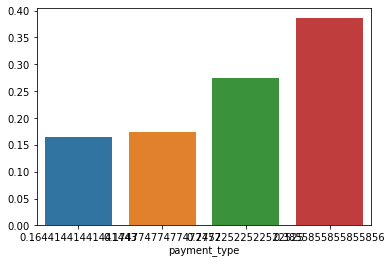

In [49]:
sns.barplot(s1.index, s1.values, data = s1)

In [135]:
mtm_churned

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
1,True,DSL,0,Electronic check,1,25.10,<= 1 month,<= 1 yr,1 mo
2,True,DSL,0,Bank transfer automatic,1,30.50,<= 1 month,<= 1 yr,1 mo
4,True,No Internet Service,0,Electronic check,1,19.85,<= 1 month,<= 1 yr,1 mo
5,True,Fiber Optic,0,Electronic check,1,99.75,<= 1 month,<= 1 yr,1 mo
6,True,Fiber Optic,0,Mailed check,1,80.20,<= 1 month,<= 1 yr,1 mo
...,...,...,...,...,...,...,...,...,...
3858,True,Fiber Optic,0,Electronic check,69,102.95,> 36 months,6 yrs,> 1 yr
3860,True,Fiber Optic,0,Electronic check,69,105.30,> 36 months,6 yrs,> 1 yr
3861,True,Fiber Optic,0,Credit card automatic,70,99.45,> 36 months,6 yrs,> 1 yr
3873,True,Fiber Optic,0,Credit card automatic,72,105.10,> 36 months,6 yrs,> 1 yr


In [136]:
#bin all mtm churned by tenure length

bins = [0, 1, 6, 12, 24, 36, 80]
mtm_churned['tenure_bins'] = pd.cut(mtm_churned['tenure'], bins)
mtm_churned.sample(15)

<ipython-input-136-513e99f56a5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtm_churned['tenure_bins'] = pd.cut(mtm_churned['tenure'], bins)


,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
178,True,No Internet Service,0,Mailed check,1,20.25,"(0, 1]",<= 1 yr,1 mo
1451,True,DSL,0,Credit card automatic,7,30.50,"(6, 12]",<= 1 yr,7 mo
2613,True,Fiber Optic,0,Electronic check,22,96.00,"(12, 24]",2 yrs,> 1 yr
2539,True,Fiber Optic,0,Bank transfer automatic,21,104.40,"(12, 24]",2 yrs,> 1 yr
187,True,Fiber Optic,0,Mailed check,1,85.80,"(0, 1]",<= 1 yr,1 mo
1880,True,DSL,0,Credit card automatic,11,72.15,"(6, 12]",<= 1 yr,11 mo
1893,True,Fiber Optic,0,Electronic check,11,76.50,"(6, 12]",<= 1 yr,11 mo
664,True,DSL,0,Electronic check,2,45.15,"(1, 6]",<= 1 yr,2 mo
1311,True,DSL,0,Mailed check,5,50.60,"(1, 6]",<= 1 yr,5 mo
1083,True,Fiber Optic,0,Electronic check,4,78.45,"(1, 6]",<= 1 yr,4 mo


In [137]:
#adding labels for each bin

bins = [0, 1, 6, 12, 24, 36, 80]
labels = ['<= 1 month', '2-6 months', '7-12 months', '13-24 months', '25-36 months', '> 36 months']
mtm_churned['tenure_bins'] = pd.cut(mtm_churned['tenure'], bins=bins, labels=labels)

<ipython-input-137-edc1a62193e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtm_churned['tenure_bins'] = pd.cut(mtm_churned['tenure'], bins=bins, labels=labels)


In [138]:
mtm_churned.sample(10)

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
3295,True,DSL,0,Credit card automatic,39,57.15,> 36 months,4 yrs,> 1 yr
1072,True,DSL,0,Electronic check,4,46.00,2-6 months,<= 1 yr,4 mo
743,True,Fiber Optic,0,Electronic check,2,89.50,2-6 months,<= 1 yr,2 mo
1421,True,Fiber Optic,0,Mailed check,7,74.65,7-12 months,<= 1 yr,7 mo
1927,True,Fiber Optic,0,Mailed check,12,112.95,7-12 months,<= 1 yr,12 mo
393,True,Fiber Optic,0,Electronic check,1,73.55,<= 1 month,<= 1 yr,1 mo
1737,True,Fiber Optic,0,Electronic check,9,83.85,7-12 months,<= 1 yr,9 mo
362,True,Fiber Optic,0,Electronic check,1,79.35,<= 1 month,<= 1 yr,1 mo
2703,True,Fiber Optic,0,Electronic check,24,84.80,13-24 months,2 yrs,> 1 yr
363,True,Fiber Optic,0,Mailed check,1,70.60,<= 1 month,<= 1 yr,1 mo


In [139]:
mtm_churned.groupby('tenure_bins').tenure_bins.count()

tenure_bins
<= 1 month      382
2-6 months      396
7-12 months     250
13-24 months    276
25-36 months    160
> 36 months     191
Name: tenure_bins, dtype: int64

In [140]:
#now I can see the counts of churned customers in nice groups.  This is pretty good info!!!

In [141]:
mtm_churned.tenure_bins.value_counts(normalize = True, sort = False)

<= 1 month      0.230816
2-6 months      0.239275
7-12 months     0.151057
13-24 months    0.166767
25-36 months    0.096677
> 36 months     0.115408
Name: tenure_bins, dtype: float64

In [142]:
fiber_churned = mtm_churned[mtm_churned.internet_type_desc == "Fiber Optic"]

fiber_churned

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
5,True,Fiber Optic,0,Electronic check,1,99.75,<= 1 month,<= 1 yr,1 mo
6,True,Fiber Optic,0,Mailed check,1,80.20,<= 1 month,<= 1 yr,1 mo
7,True,Fiber Optic,0,Mailed check,1,70.90,<= 1 month,<= 1 yr,1 mo
8,True,Fiber Optic,0,Electronic check,1,75.90,<= 1 month,<= 1 yr,1 mo
9,True,Fiber Optic,0,Credit card automatic,1,85.55,<= 1 month,<= 1 yr,1 mo
...,...,...,...,...,...,...,...,...,...
3858,True,Fiber Optic,0,Electronic check,69,102.95,> 36 months,6 yrs,> 1 yr
3860,True,Fiber Optic,0,Electronic check,69,105.30,> 36 months,6 yrs,> 1 yr
3861,True,Fiber Optic,0,Credit card automatic,70,99.45,> 36 months,6 yrs,> 1 yr
3873,True,Fiber Optic,0,Credit card automatic,72,105.10,> 36 months,6 yrs,> 1 yr


In [143]:
fiber_churned.tenure_bins.value_counts(normalize = True, sort = False)

<= 1 month      0.174699
2-6 months      0.221170
7-12 months     0.160069
13-24 months    0.185886
25-36 months    0.117900
> 36 months     0.140275
Name: tenure_bins, dtype: float64

In [220]:
fiber_churned.tenure.value_counts(sort = False).head()



1    203
2     74
3     57
4     53
5     45
Name: tenure, dtype: int64

In [221]:
fiber_churned.tenure.value_counts(sort = False).tail()

67    2
68    4
69    4
70    1
72    2
Name: tenure, dtype: int64

In [146]:
type(fiber_churned.tenure.value_counts(sort = False))

pandas.core.series.Series

In [147]:
#create tenure bins by year up to 6 years

year_bins = [0, 12, 24, 36, 48, 60, 72]
yr_labels = ['<= 1 yr', '2 yrs', '3 yrs', '4 yrs', '5 yrs', '6 yrs']
mtm_churned['tenure_by_yr_bins'] = pd.cut(mtm_churned['tenure'], bins=year_bins, labels=yr_labels)

<ipython-input-147-18733b25d1ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtm_churned['tenure_by_yr_bins'] = pd.cut(mtm_churned['tenure'], bins=year_bins, labels=yr_labels)


In [148]:
#since more customers leave in the first year, create tenure bins by month in first year

mos_in_first_year_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 80]
mo_labels = ['1 mo', '2 mo', '3 mo', '4 mo', '5 mo', '6 mo', '7 mo', '8 mo', '9 mo', '10 mo', '11 mo', '12 mo', '> 1 yr']
mtm_churned['months_in_first_yr_bins'] = pd.cut(mtm_churned['tenure'], bins=mos_in_first_year_bins, labels=mo_labels)

<ipython-input-148-a3c8acef19b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtm_churned['months_in_first_yr_bins'] = pd.cut(mtm_churned['tenure'], bins=mos_in_first_year_bins, labels=mo_labels)


In [222]:
mtm_churned.sample()

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
373,True,Fiber Optic,0,Mailed check,1,71.55,<= 1 month,<= 1 yr,1 mo


In [150]:
#all mtm customers by year

mtm_churned.tenure_by_yr_bins.value_counts(normalize = True, sort = False)

<= 1 yr    0.621148
2 yrs      0.166767
3 yrs      0.096677
4 yrs      0.061631
5 yrs      0.039879
6 yrs      0.013897
Name: tenure_by_yr_bins, dtype: float64

In [223]:
#all mtm customers by months before 2nd year  (these percentages are misleading bc it includes the > 1 year)

#mtm_churned.months_in_first_yr_bins.value_counts(normalize = True, sort = False)

In [224]:
#mtm_churned.months_in_first_yr_bins.value_counts(sort = False)

In [201]:
#example code below to get a subset of specific rows that match specific values in a column
#array = ['yellow', 'green']
#df.loc[df['favorite_color'].isin(array)]
#this shows only mtm customers who have a year of less in their tenure

one_yr_array = ['1 mo', '2 mo', '3 mo', '4 mo', '5 mo', '6 mo', '7 mo', '8 mo', '9 mo', '10 mo', '11 mo', '12 mo']
one_yr_or_less = mtm_churned.loc[mtm_churned['months_in_first_yr_bins'].isin(one_yr_array)] #naming this subset df

one_yr_or_less

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
1,True,DSL,0,Electronic check,1,25.10,<= 1 month,<= 1 yr,1 mo
2,True,DSL,0,Bank transfer automatic,1,30.50,<= 1 month,<= 1 yr,1 mo
4,True,No Internet Service,0,Electronic check,1,19.85,<= 1 month,<= 1 yr,1 mo
5,True,Fiber Optic,0,Electronic check,1,99.75,<= 1 month,<= 1 yr,1 mo
6,True,Fiber Optic,0,Mailed check,1,80.20,<= 1 month,<= 1 yr,1 mo
...,...,...,...,...,...,...,...,...,...
1987,True,Fiber Optic,0,Mailed check,12,96.65,7-12 months,<= 1 yr,12 mo
1989,True,Fiber Optic,0,Bank transfer automatic,12,89.70,7-12 months,<= 1 yr,12 mo
1991,True,Fiber Optic,0,Credit card automatic,12,74.40,7-12 months,<= 1 yr,12 mo
1992,True,Fiber Optic,0,Electronic check,12,80.45,7-12 months,<= 1 yr,12 mo


In [202]:
type(one_yr_or_less)

pandas.core.frame.DataFrame

In [203]:
#value counts for the one year or less mtm churned customers

one_yr_or_less.months_in_first_yr_bins.value_counts()

1 mo     382
2 mo     120
3 mo      92
4 mo      84
5 mo      61
7 mo      51
11 mo     47
9 mo      45
8 mo      44
6 mo      39
10 mo     34
12 mo     29
>1 yr      0
Name: months_in_first_yr_bins, dtype: int64

In [206]:
one_yr_or_less.months_in_first_yr_bins.count()

1028

In [204]:
one_yr_or_less.months_in_first_yr_bins.value_counts(normalize = True, sort = False)

1 mo     0.371595
2 mo     0.116732
3 mo     0.089494
4 mo     0.081712
5 mo     0.059339
6 mo     0.037938
7 mo     0.049611
8 mo     0.042802
9 mo     0.043774
10 mo    0.033074
11 mo    0.045720
12 mo    0.028210
>1 yr    0.000000
Name: months_in_first_yr_bins, dtype: float64

In [207]:
# example code to find rows that have one value from a specific column df.loc[df['favorite_color'] == 'yellow']

one_yr_or_less.loc[one_yr_or_less['internet_type_desc'] == 'Fiber Optic']

,has_churned,internet_type_desc,contract_type,payment_type,tenure,average_monthly_charges,tenure_bins,tenure_by_yr_bins,months_in_first_yr_bins
5,True,Fiber Optic,0,Electronic check,1,99.75,<= 1 month,<= 1 yr,1 mo
6,True,Fiber Optic,0,Mailed check,1,80.20,<= 1 month,<= 1 yr,1 mo
7,True,Fiber Optic,0,Mailed check,1,70.90,<= 1 month,<= 1 yr,1 mo
8,True,Fiber Optic,0,Electronic check,1,75.90,<= 1 month,<= 1 yr,1 mo
9,True,Fiber Optic,0,Credit card automatic,1,85.55,<= 1 month,<= 1 yr,1 mo
...,...,...,...,...,...,...,...,...,...
1987,True,Fiber Optic,0,Mailed check,12,96.65,7-12 months,<= 1 yr,12 mo
1989,True,Fiber Optic,0,Bank transfer automatic,12,89.70,7-12 months,<= 1 yr,12 mo
1991,True,Fiber Optic,0,Credit card automatic,12,74.40,7-12 months,<= 1 yr,12 mo
1992,True,Fiber Optic,0,Electronic check,12,80.45,7-12 months,<= 1 yr,12 mo


In [208]:
#fiber customers less than a year tenure

under_year_fiber_churned = one_yr_or_less.loc[one_yr_or_less['internet_type_desc'] == 'Fiber Optic']

under_year_fiber_churned.months_in_first_yr_bins.count()

646

In [209]:
under_year_fiber_churned.months_in_first_yr_bins.value_counts()

1 mo     203
2 mo      74
3 mo      57
4 mo      53
5 mo      45
7 mo      39
11 mo     36
8 mo      32
9 mo      30
6 mo      28
10 mo     25
12 mo     24
>1 yr      0
Name: months_in_first_yr_bins, dtype: int64

In [210]:
under_year_fiber_churned.months_in_first_yr_bins.value_counts(normalize = True, sort = False)

1 mo     0.314241
2 mo     0.114551
3 mo     0.088235
4 mo     0.082043
5 mo     0.069659
6 mo     0.043344
7 mo     0.060372
8 mo     0.049536
9 mo     0.046440
10 mo    0.038700
11 mo    0.055728
12 mo    0.037152
>1 yr    0.000000
Name: months_in_first_yr_bins, dtype: float64

In [152]:
#fiber customers by year

fiber_churned.tenure_by_yr_bins.value_counts(normalize = True, sort = False)

<= 1 yr    0.555938
2 yrs      0.185886
3 yrs      0.117900
4 yrs      0.073150
5 yrs      0.048193
6 yrs      0.018933
Name: tenure_by_yr_bins, dtype: float64

In [212]:
#fiber customers by month before 2nd year  (misleading percentages since it still includes over a year customers)

#fiber_churned.months_in_first_yr_bins.value_counts(normalize = True, sort = False)

In [213]:
#sns.histplot(fiber_churned.months_in_first_yr_bins)  (misleading since it includes over a year customers)

<AxesSubplot:xlabel='months_in_first_yr_bins', ylabel='Count'>

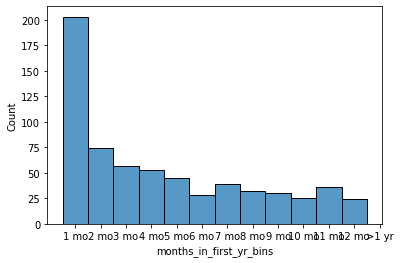

In [211]:
sns.histplot(under_year_fiber_churned.months_in_first_yr_bins)

#chart showing churned fiber customers 1 year or under of tenure.

<AxesSubplot:xlabel='tenure_by_yr_bins', ylabel='Count'>

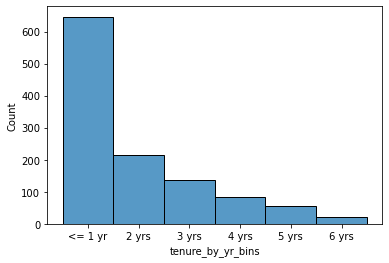

In [159]:
sns.histplot(fiber_churned.tenure_by_yr_bins)

<AxesSubplot:xlabel='tenure_bins', ylabel='Count'>

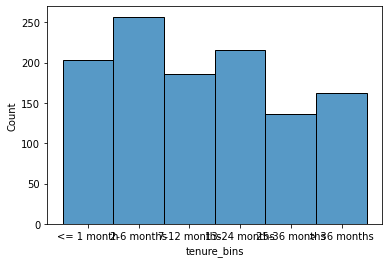

In [160]:
sns.histplot(fiber_churned.tenure_bins)